# Mc Donald's Service time for dine-in and drive-thru

H0: Average service time is more than 189 seconds
HA: Average service time is less than 189 seconds

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

In [67]:
df=pd.read_csv("/Users/poyraz/Google Drive/Data Science/Projects/McDonald's/group project 1/data.csv")

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
drive      60 non-null int64
dine_in    60 non-null int64
dtypes: int64(2)
memory usage: 1.1 KB


In [69]:
df.head()

,drive,dine_in
0,74,93
1,65,40
2,62,183
3,144,200
4,120,360


In [70]:
df.describe()

,drive,dine_in
count,60.000000,60.000000
mean,148.183333,218.833333
std,71.551923,83.727598
min,62.000000,40.000000
25%,90.000000,155.000000
50%,142.000000,200.000000
75%,179.250000,266.000000
max,373.000000,412.000000


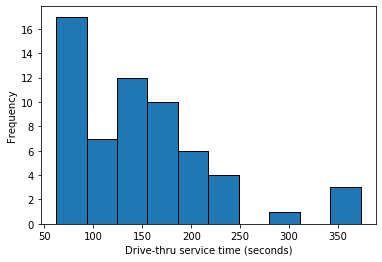

In [100]:
plt.hist(df['drive'],edgecolor='k')

plt.xlabel('Drive-thru service time (seconds)')
plt.ylabel('Frequency')
plt.show()

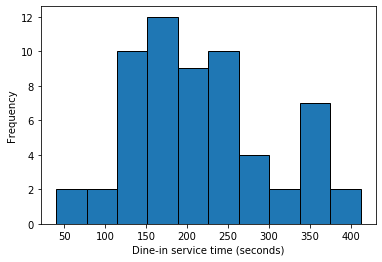

In [101]:
plt.hist(df['dine_in'], edgecolor='k')

plt.xlabel('Dine-in service time (seconds)')
plt.ylabel('Frequency')

plt.show()

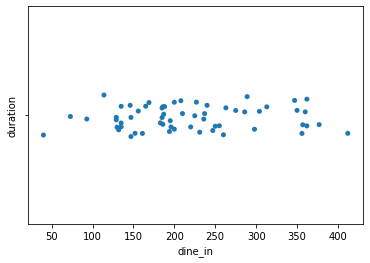

In [105]:
sns.stripplot(x='dine_in', data=df)
plt.ylabel('duration')
plt.show()

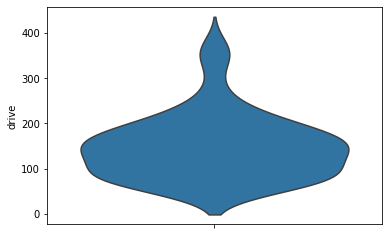

In [110]:
sns.violinplot(y='drive',size=2, jitter=True, data=df,inner=None)
plt.show()

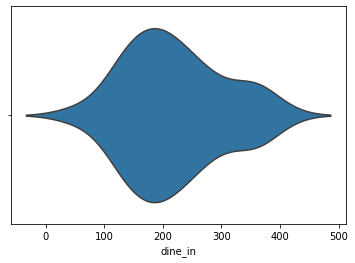

In [111]:
sns.violinplot(x='dine_in',size=2, jitter=True, data=df,inner=None)
plt.show()

In [73]:
merged=df.drive.append(df['dine_in'])

In [74]:
merged=pd.DataFrame(data=merged)

In [75]:
merged.head()

,0
0,74
1,65
2,62
3,144
4,120


In [76]:
merged['ser_time']=merged[0]

In [77]:
merged.head()

,0,ser_time
0,74,74
1,65,65
2,62,62
3,144,144
4,120,120


In [78]:
merged.drop(0, inplace=True, axis=1)

In [79]:
merged.head()


,ser_time
0,74
1,65
2,62
3,144
4,120


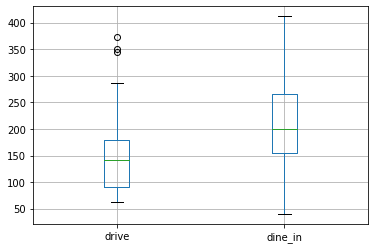

In [80]:
df.boxplot()
plt.show()

In [82]:
#Normality

# Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = df['drive']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')




stat=0.894, p=0.000
Probably not Gaussian


In [83]:
# Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = df['dine_in']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.966, p=0.091
Probably Gaussian


In [94]:
sm.stats.ztest(df['drive'], value = 189.5,alternative = "smaller")

(-4.4728011556699165, 3.860078037092186e-06)

p_value for the drive-thru is lower than 0.05. Therefore, we can reject the Null hypothesis, and state that service time for drive thru is less than 189.5 seconds

In [93]:
sm.stats.ztest(df['dine_in'], value = 189.5,alternative = "smaller")

(2.7137410759325733, 0.9966735928898343)

p_value for the dine_in is greater than 0.05. Therefore, we accept the Null hypothesis, and state that service time for dine_in is greater than 189.5 seconds